In [1]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

In [2]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sandh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
!pip install textblob

In [4]:
from textblob import TextBlob
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

In [5]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sandh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
df = pd.read_csv('rntata2000_tweets_data.csv')

In [7]:
df.head()

,Unnamed: 0,link,text,user,likes,quotes,retweets,comments
0,0,https://twitter.com/RNTata2000/status/17917214...,Monday is voting day in Mumbai. I urge all Mum...,Ratan N. Tata,48436,188,4942,1243
1,1,https://twitter.com/RNTata2000/status/17703922...,The investments being made in Assam transform ...,Ratan N. Tata,18375,65,1318,1261
2,2,https://twitter.com/SAHMumbai/status/175551833...,Big things are coming 🐶🐱,Small Animal Hospital Mumbai,1588,27,201,1003
3,3,https://twitter.com/RNTata2000/status/17380921...,Delighted to receive this informative book @na...,Ratan N. Tata,14307,68,1158,1493
4,4,https://twitter.com/RNTata2000/status/17188545...,I have made no suggestions to the ICC or any c...,Ratan N. Tata,65620,274,5124,3085


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  60 non-null     int64 
 1   link        60 non-null     object
 2   text        56 non-null     object
 3   user        60 non-null     object
 4   likes       60 non-null     int64 
 5   quotes      60 non-null     int64 
 6   retweets    60 non-null     int64 
 7   comments    60 non-null     int64 
dtypes: int64(5), object(3)
memory usage: 3.9+ KB


In [9]:
df.isnull().sum()

Unnamed: 0    0
link          0
text          4
user          0
likes         0
quotes        0
retweets      0
comments      0
dtype: int64

In [10]:
df.columns

Index(['Unnamed: 0', 'link', 'text', 'user', 'likes', 'quotes', 'retweets',
       'comments'],
      dtype='object')

In [11]:
text_df = df.drop(['link', 'user', 'likes', 'quotes', 'retweets','comments'], axis=1)
text_df.head()

,Unnamed: 0,text
0,0,Monday is voting day in Mumbai. I urge all Mum...
1,1,The investments being made in Assam transform ...
2,2,Big things are coming 🐶🐱
3,3,Delighted to receive this informative book @na...
4,4,I have made no suggestions to the ICC or any c...


In [12]:
df_cleaned = text_df.dropna()

In [13]:
df_cleaned.head(100)

,Unnamed: 0,text
0,0,Monday is voting day in Mumbai. I urge all Mum...
1,1,The investments being made in Assam transform ...
2,2,Big things are coming 🐶🐱
3,3,Delighted to receive this informative book @na...
4,4,I have made no suggestions to the ICC or any c...
5,5,"Now that the monsoons are here, a lot of stray..."
6,6,I request netizens to please stay aware. I hav...
7,7,Words cannot describe the deep sense of loss I...
8,8,My condolences
9,9,I remember JRD fondly on his 118th birth anniv...


In [14]:
!pip install clean-text

In [15]:
from cleantext import clean

In [16]:
def data_processing(text):
    text = str(text)
    text = text.lower()
    text = re.sub(r"https\S+|www\S+https\S+", '',text, flags=re.MULTILINE)
    text = re.sub(r'\@w+|\#','',text)
    text = re.sub(r'[^\w\s]','',text)
    text = clean(text,no_emoji=True)
    text_tokens = word_tokenize(text)
    filtered_text = [w for w in text_tokens if not w in stop_words]
    return " ".join(filtered_text)

In [17]:
text_df.text = text_df['text'].apply(data_processing)

In [18]:
text_df = text_df.drop_duplicates('text')

In [19]:
stemmer = PorterStemmer()
def stemming(data):
    text = [stemmer.stem(word) for word in data]
    return data

In [20]:
text_df['text'] = text_df['text'].apply(lambda x: stemming(x))

In [21]:
text_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 57 entries, 0 to 59
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  57 non-null     int64 
 1   text        57 non-null     object
dtypes: int64(1), object(1)
memory usage: 1.3+ KB


In [22]:
def polarity(text):
    return TextBlob(text).sentiment.polarity

In [23]:
text_df['polarity'] = text_df['text'].apply(polarity)

In [24]:
text_df.head(10)

,Unnamed: 0,text,polarity
0,0,monday voting day mumbai urge mumbaikars go vo...,0.200000
1,1,investments made assam transform state complex...,0.066477
2,2,big things coming,0.000000
3,3,delighted receive informative book narendramodi,0.700000
4,4,made suggestions icc cricket faculty cricket m...,0.416667
5,5,monsoons lot stray cats dogs take shelter cars...,-0.033333
6,6,request netizens please stay aware association...,0.250000
7,7,words describe deep sense loss feel passing fr...,0.116667
8,8,condolences,0.000000
9,9,remember jrd fondly 118th birth anniversary wa...,0.166667


In [25]:
def sentiment(label):
    if label <0:
        return "Negative"
    elif label ==0:
        return "Neutral"
    elif label>0:
        return "Positive"

In [26]:
text_df['sentiment'] = text_df['polarity'].apply(sentiment)

In [27]:
text_df.head(10)

,Unnamed: 0,text,polarity,sentiment
0,0,monday voting day mumbai urge mumbaikars go vo...,0.200000,Positive
1,1,investments made assam transform state complex...,0.066477,Positive
2,2,big things coming,0.000000,Neutral
3,3,delighted receive informative book narendramodi,0.700000,Positive
4,4,made suggestions icc cricket faculty cricket m...,0.416667,Positive
5,5,monsoons lot stray cats dogs take shelter cars...,-0.033333,Negative
6,6,request netizens please stay aware association...,0.250000,Positive
7,7,words describe deep sense loss feel passing fr...,0.116667,Positive
8,8,condolences,0.000000,Neutral
9,9,remember jrd fondly 118th birth anniversary wa...,0.166667,Positive


Text(0.5, 1.0, 'Distribution of sentiments')

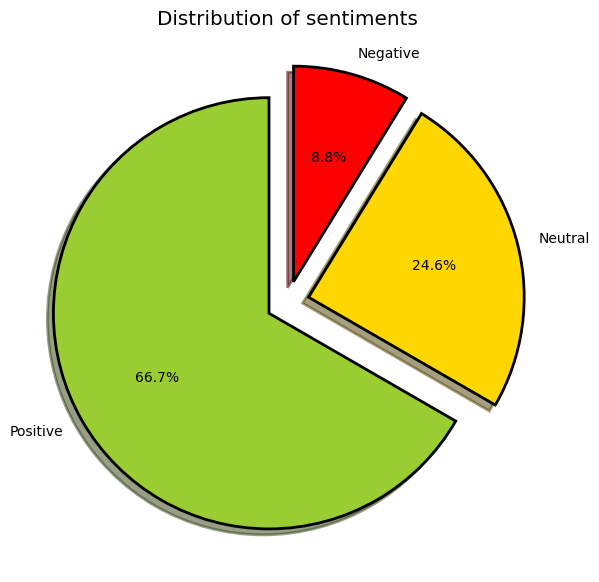

In [28]:
fig = plt.figure(figsize=(7,7))
colors = ("yellowgreen", "gold", "red")
wp = {'linewidth':2, 'edgecolor':"black"}
tags = text_df['sentiment'].value_counts()
explode = (0.1,0.1,0.1)
tags.plot(kind='pie', autopct='%1.1f%%', shadow=True, colors = colors,
         startangle=90, wedgeprops = wp, explode = explode, label='')
plt.title('Distribution of sentiments')